# Model Comparison 

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models_dir = 'models'
histories = {}

def read_history(history_path):
    with open(history_path, 'r') as file:
        return json.load(file)

for model_name in os.listdir(models_dir):
    model_path = os.path.join(models_dir, model_name)
    if os.path.isdir(model_path):
        history_path = os.path.join(model_path, 'history.json')
        if os.path.exists(history_path):
            history = read_history(history_path)
            histories[model_name] = history

In [3]:
history_df = pd.DataFrame(histories).transpose()
history_df.head()

,loss,accuracy,val_loss,val_accuracy,precision,recall,val_precision,val_recall
advance_model_ai-art,"[0.3775153160095215, 0.37731820344924927, 0.36...","[0.8476917147636414, 0.8495984077453613, 0.850...","[0.500403106212616, 0.39075061678886414, 0.375...","[0.8280960917472839, 0.8396487832069397, 0.846...",NaN,NaN,NaN,NaN
advance_model_cifake,"[0.46783602237701416, 0.3968423306941986, 0.37...","[0.7816799879074097, 0.8231800198554993, 0.836...","[0.3157667815685272, 0.34705182909965515, 0.35...","[0.8688499927520752, 0.8590499758720398, 0.841...",NaN,NaN,NaN,NaN
alexnet_model_cifake,"[0.6935606002807617, 0.69319748878479, 0.69319...","[0.49619999527931213, 0.4987800121307373, 0.49...","[0.6931579113006592, 0.6931785941123962, 0.693...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",NaN,NaN,NaN,NaN
basic-tanh_model_cifake,"[0.6140819787979126, 0.5802964568138123, 0.546...","[0.6613799929618835, 0.6952599883079529, 0.724...","[0.5426006317138672, 0.5297104120254517, 0.479...","[0.7305999994277954, 0.7472000122070312, 0.766...",NaN,NaN,NaN,NaN
basic_model_ai-art,"[0.4408271610736847, 0.42360320687294006, 0.41...","[0.8249841332435608, 0.8284509181976318, 0.835...","[0.411237895488739, 0.40080660581588745, 0.390...","[0.8253234624862671, 0.8283271789550781, 0.834...",NaN,NaN,NaN,NaN


In [4]:
history_df_100_epochs = history_df[history_df['accuracy'].apply(len) == 100]
history_df_10_epochs = history_df[history_df['accuracy'].apply(len) == 10]
history_df_early_epochs = history_df[(history_df['accuracy'].apply(len) != 10) & (history_df['accuracy'].apply(len) != 100)]

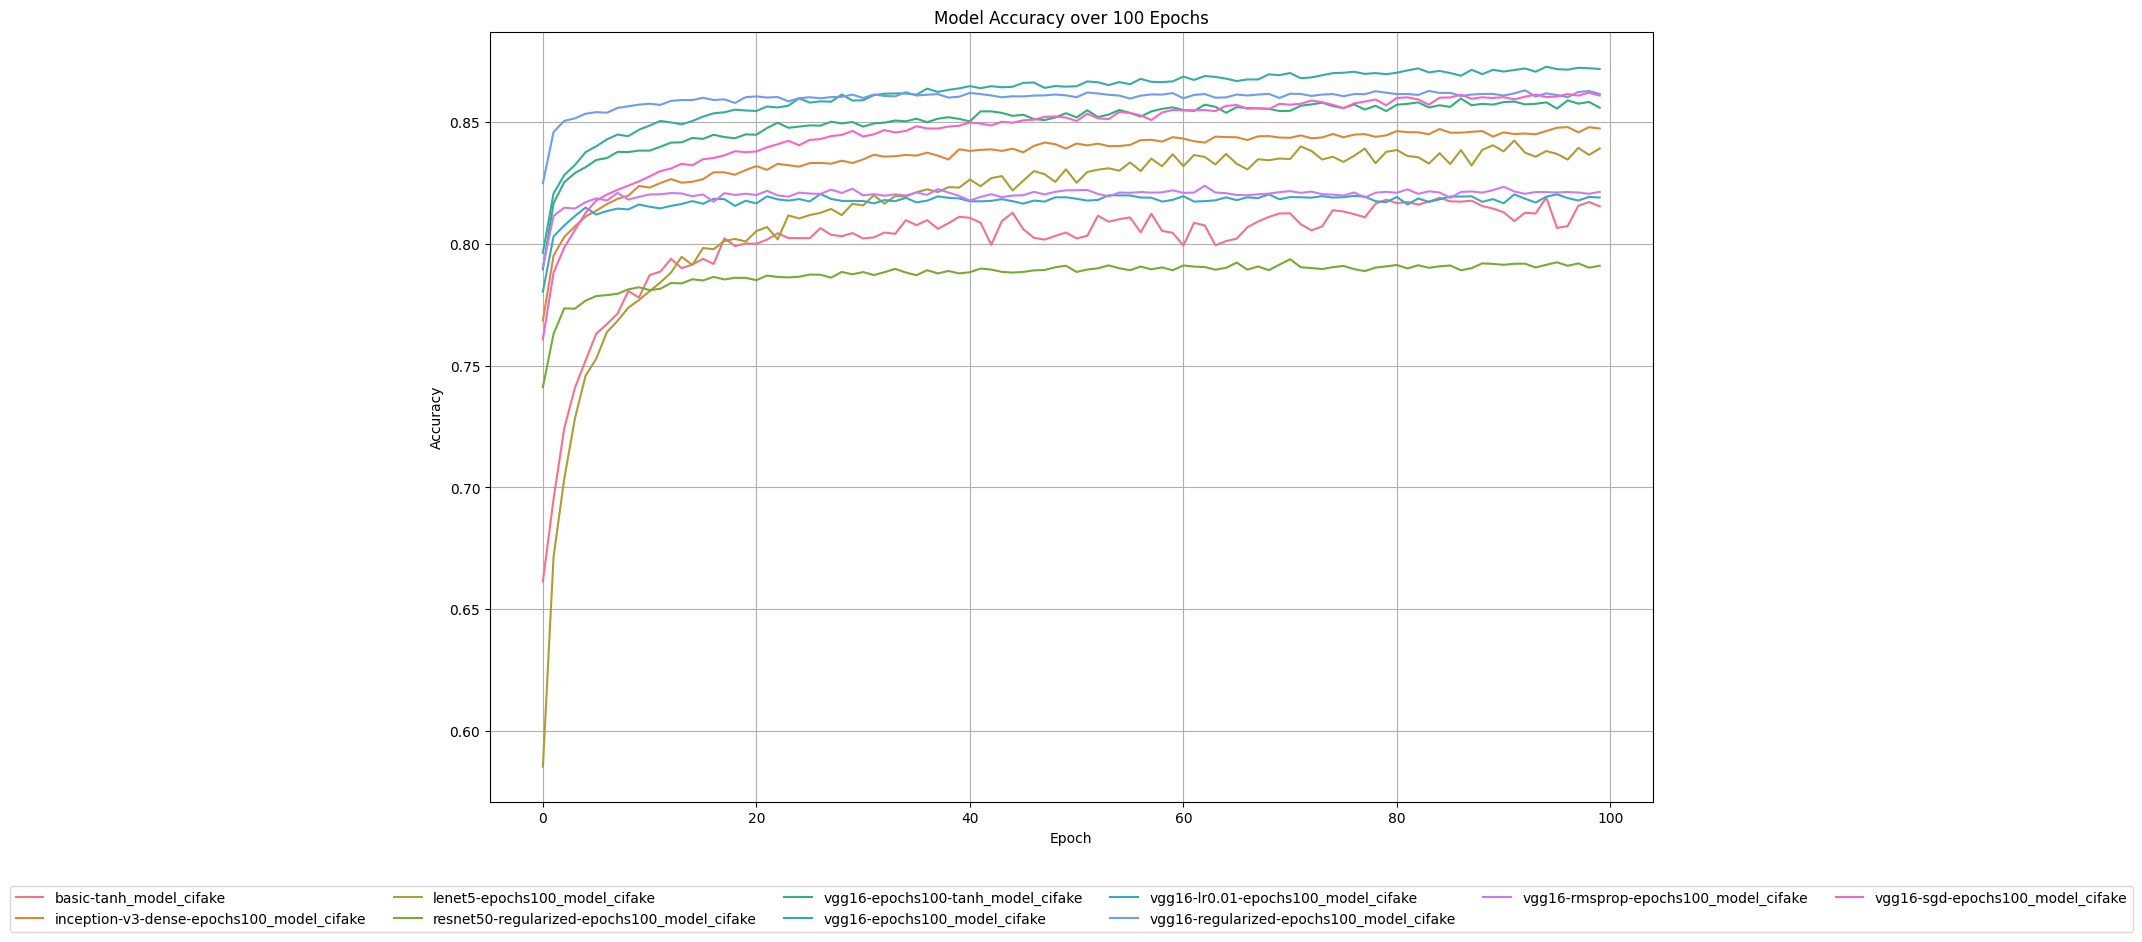

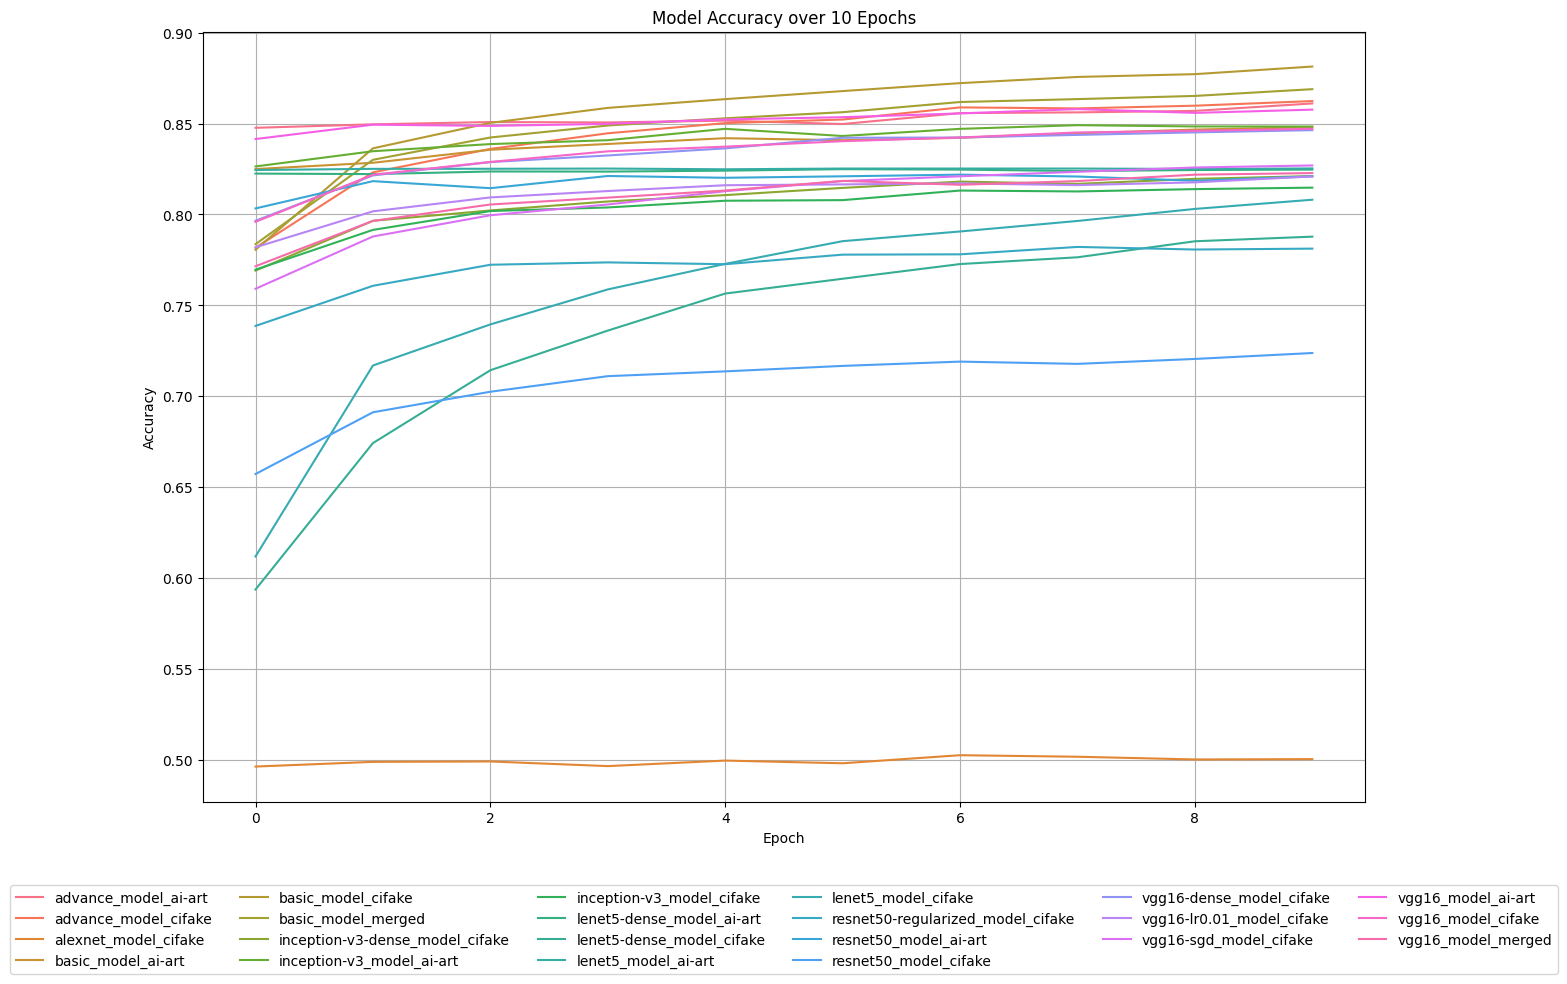

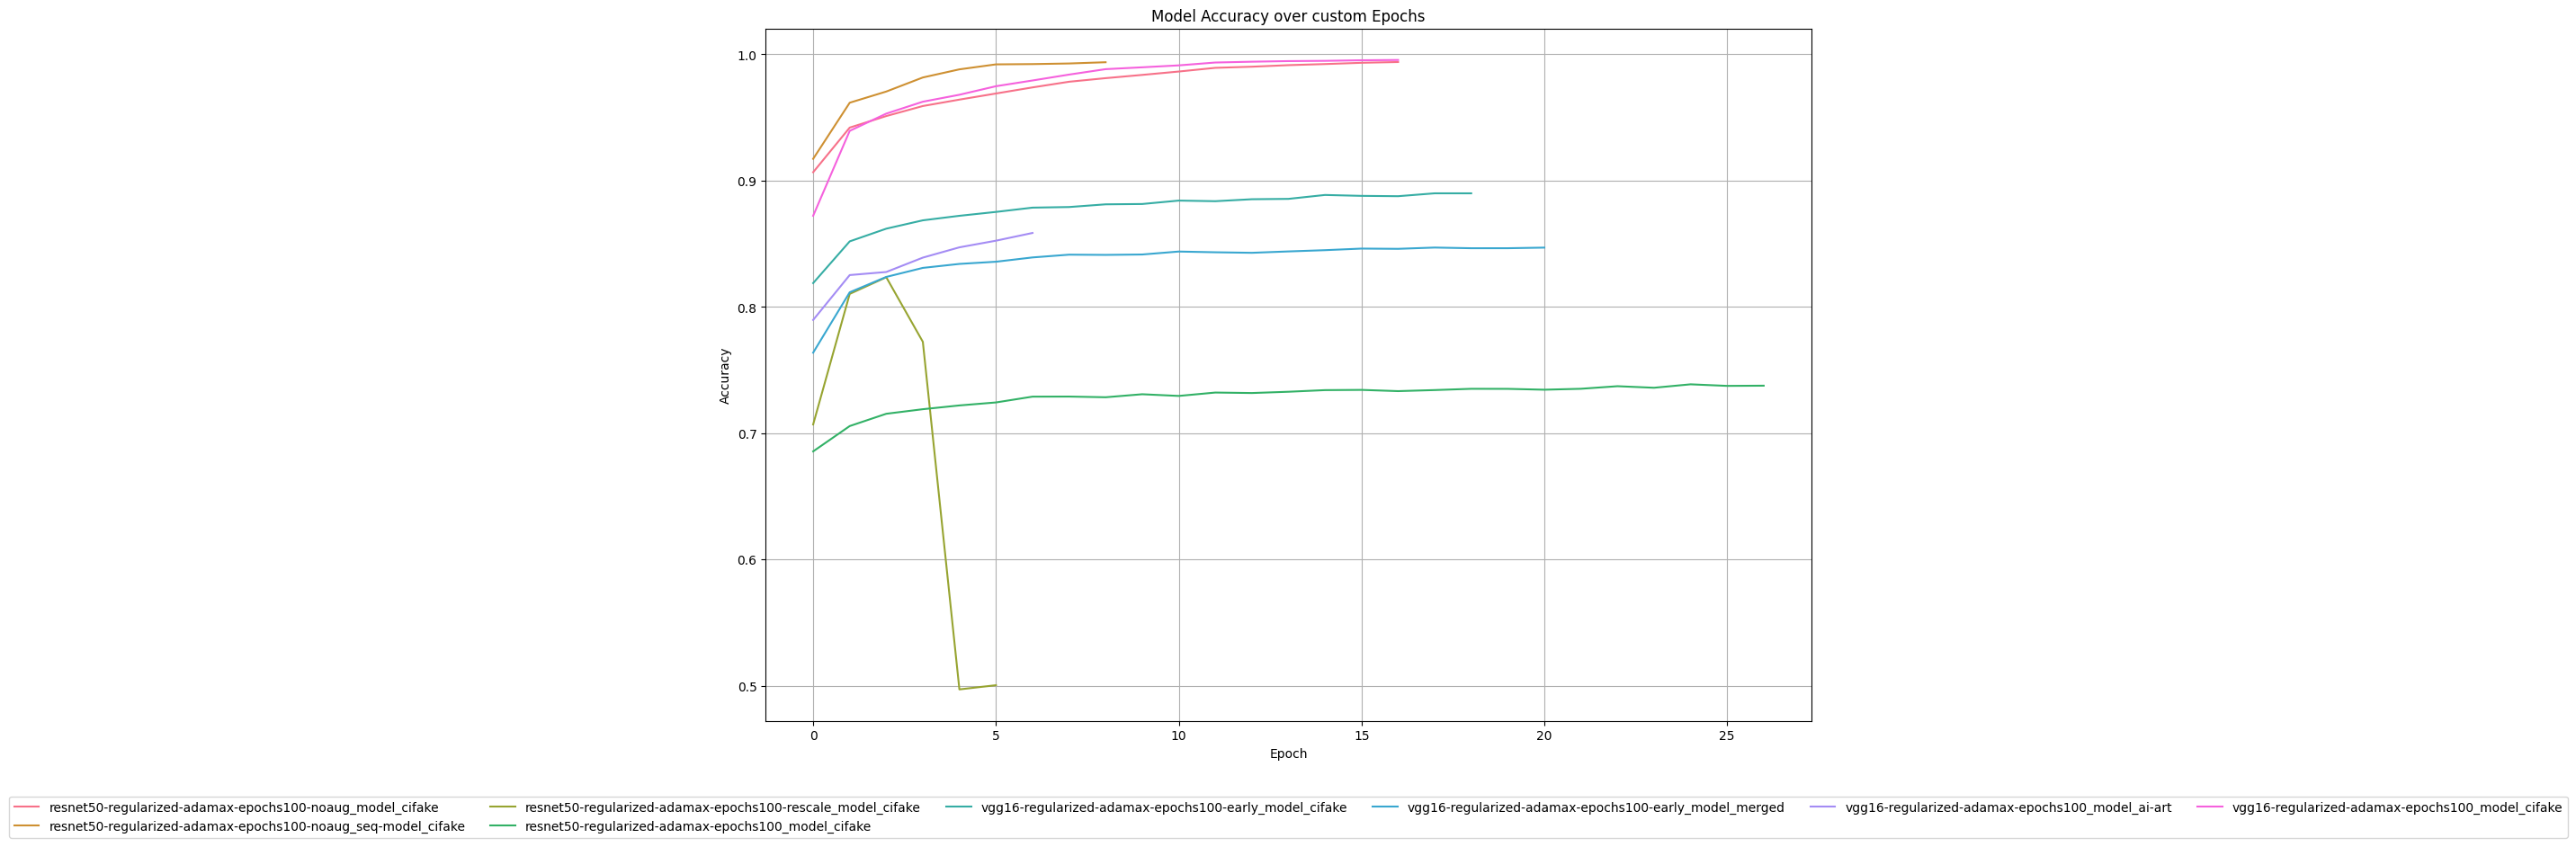

In [5]:
colors_100 = sns.color_palette("husl", len(history_df_100_epochs))
colors_10 = sns.color_palette("husl", len(history_df_10_epochs))
colors_early = sns.color_palette("husl", len(history_df_early_epochs))

def plot_accuracy(df, epochs, colors):
    plt.figure(figsize=(15, 10))
    for index, (model_name, row) in enumerate(df.iterrows()):
        accuracy_history = row['accuracy']
        plt.plot(accuracy_history, label=model_name, color=colors[index])
    plt.title(f'Model Accuracy over {epochs} Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
    plt.grid(True)


plot_accuracy(history_df_100_epochs, 100, colors_100)
plot_accuracy(history_df_10_epochs, 10, colors_10)
plot_accuracy(history_df_early_epochs, 'custom', colors_early)